# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
california =  fetch_california_housing()

X = pd.DataFrame( california.data, columns= california.feature_names)
y = california.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

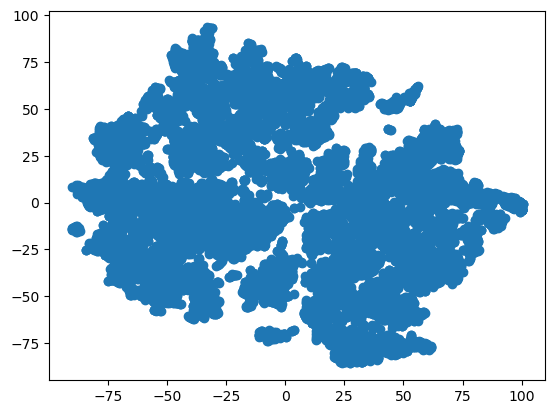

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM (использовал Population вместо CRIM, поскольку заменил датасет)  в разных кластерах.

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

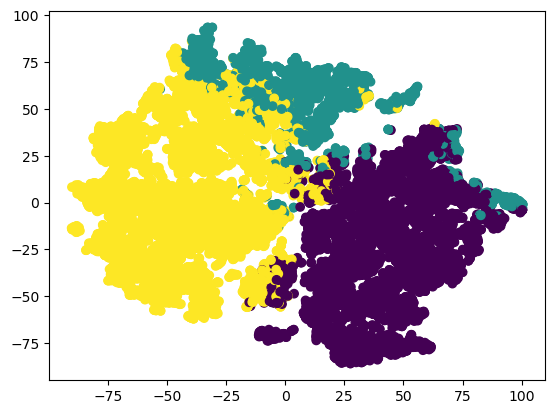

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [9]:
print('трен_первый кластер - средняя цена: ', y_train[labels_train == 0].mean())
print('трен_первый кластер - население: ', X_train.loc[labels_train == 0, 'Population'].mean())

трен_первый кластер - средняя цена:  1.932871798780488
трен_первый кластер - население:  1250.095731707317


In [10]:
print('трен_второй кластер - средняя цена: ', y_train[labels_train == 1].mean())
print('трен_второй кластер - население: ', X_train.loc[labels_train == 1, 'Population'].mean())

трен_второй кластер - средняя цена:  2.910943227124183
трен_второй кластер - население:  2098.0575980392155


In [11]:
print('трен_третий кластер - средняя цена: ', y_train[labels_train == 2].mean())
print('трен_третий кластер - население: ', X_train.loc[labels_train == 2, 'Population'].mean())

трен_третий кластер - средняя цена:  1.9198240684968018
трен_третий кластер - население:  1361.5297174840084


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM (использовал Population вместо CRIM, поскольку заменил датасет) в разных кластерах на тестовых данных.

In [12]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [13]:
print('тест_первый кластер - средняя цена: ', y_test[labels_test == 0].mean())
print('тест_первый кластер - население: ', X_test.loc[labels_test == 0, 'Population'].mean())

тест_первый кластер - средняя цена:  2.1418295
тест_первый кластер - население:  1552.4298319327731


In [14]:
print('тест_второй кластер - средняя цена: ', y_test[labels_test == 1].mean())
print('тест_второй кластер - население: ', X_test.loc[labels_test == 1, 'Population'].mean())

тест_второй кластер - средняя цена:  1.9406037586206897
тест_второй кластер - население:  987.2137931034483


In [15]:
print('тест_третий кластер - средняя цена: ', y_test[labels_test == 2].mean())
print('тест_третий кластер - население: ', X_test.loc[labels_test == 2, 'Population'].mean())

тест_третий кластер - средняя цена:  1.932999202733485
тест_третий кластер - население:  1497.253986332574
